## Imports

In [15]:
import sys
sys.path.append("..")

import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display as ipd

from src.data_loader import load_ravdess_data, load_audio_file
from src.augmentation import *
from src.config import *

## Loading

In [3]:
# Load dataset
df = load_ravdess_data()

# Load sample audio file
sample_emotion = "happy"

sample = df[df["emotion"] == sample_emotion].iloc[0]
print(f"Sample file: {sample["filename"]}")
print(f"Emotion: {sample["emotion"]}")

audio = load_audio_file(sample["file_path"])
print(f"Audio shape: {audio.shape}")
print(f"Duration: {len(audio) / SAMPLE_RATE:.2f} seconds")

Loaded 2880 audio files

Emotion distribution:
emotion
calm         384
happy        384
sad          384
angry        384
disgust      384
fear         384
surprised    384
neutral      192
Name: count, dtype: int64
Sample file: 03-01-03-01-01-01-01.wav
Emotion: happy
Audio shape: (65492,)
Duration: 2.97 seconds


In [4]:
print("Original Audio:")
ipd.display(ipd.Audio(audio, rate=SAMPLE_RATE))

Original Audio:


## Augmentations

In [11]:
# generate all augmentaion types
augmented_noise = add_noise(audio, noise_factor=0.005)
augmented_shift = shift_time(audio, sr=SAMPLE_RATE)
augmented_pitch = change_pitch(audio, sr=SAMPLE_RATE, pitch_factor=2)
augmented_speed = change_speed(audio, speed_factor=1.1)
augmented_reverb = add_reverb(audio, sr=SAMPLE_RATE)

augmentations = {
    "Original": audio,
    "With Noise": augmented_noise,
    "Time Shifted": augmented_shift,
    "Pitch Shifted (+2)": augmented_pitch,
    "Speed Changed (1.1x)": augmented_speed,
    "With Reverb": augmented_reverb
}

## Visualizations

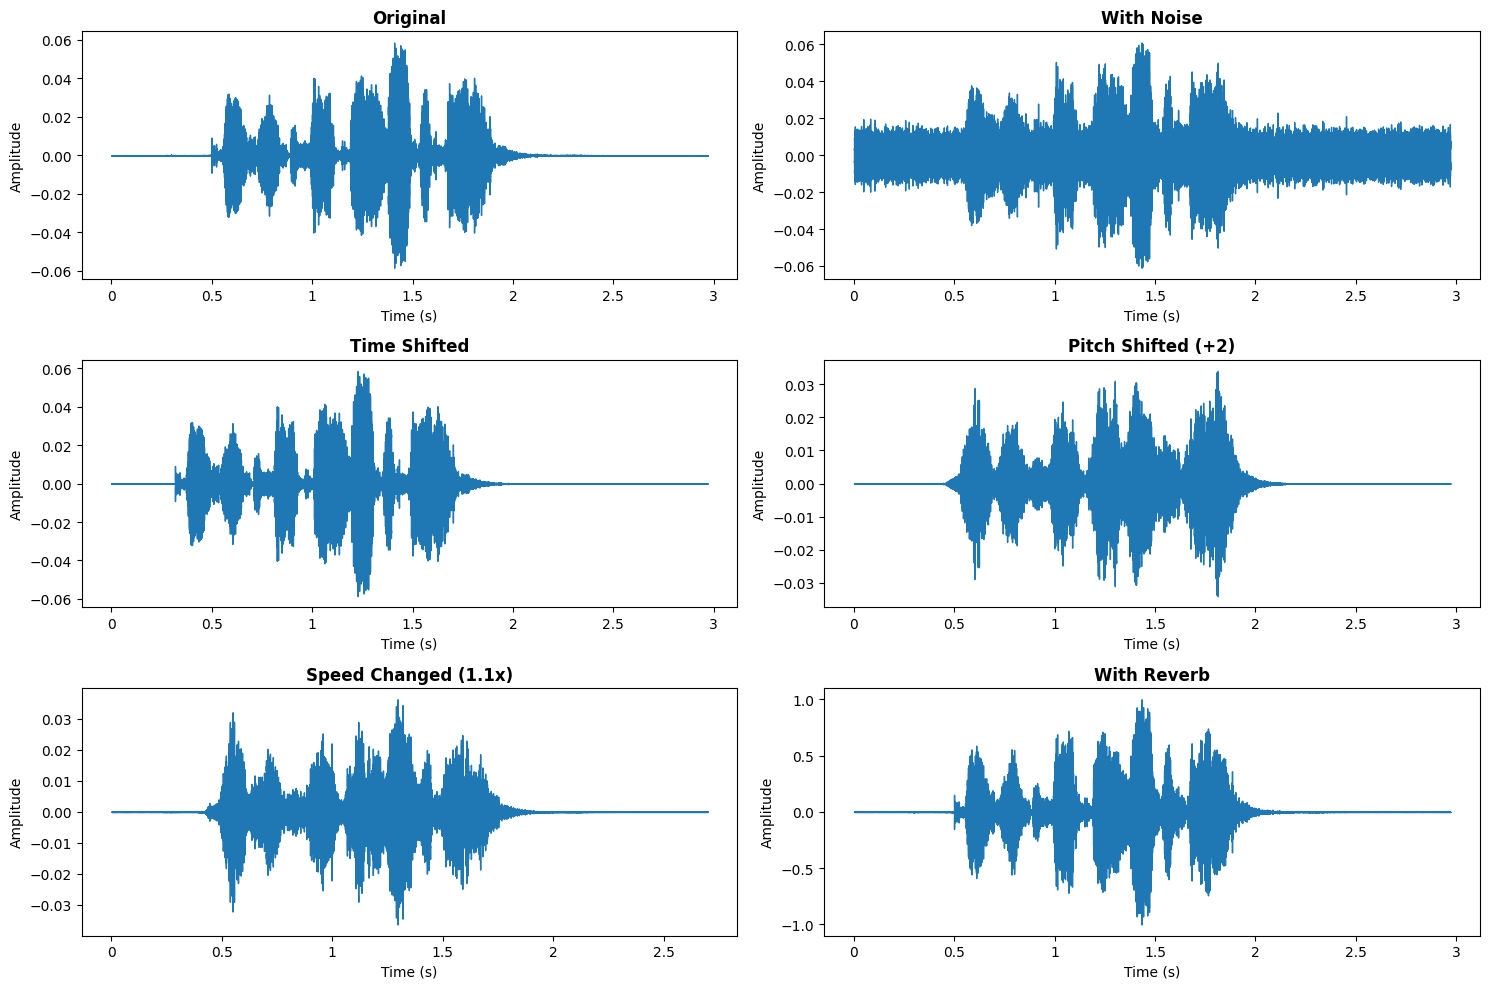

In [ ]:
# Waveforms comparison
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (title, aug_audio) in enumerate(augmentations.items()):
    librosa.display.waveshow(aug_audio, sr=SAMPLE_RATE, ax=axes[idx])
    axes[idx].set_title(title, fontsize=12, fontweight="bold")
    axes[idx].set_xlabel("Time (s)")
    axes[idx].set_ylabel("Amplitude")

plt.tight_layout()
plt.savefig("../results/plots/augmentation_waveforms.png", dpi=300, bbox_inches="tight")
plt.show()

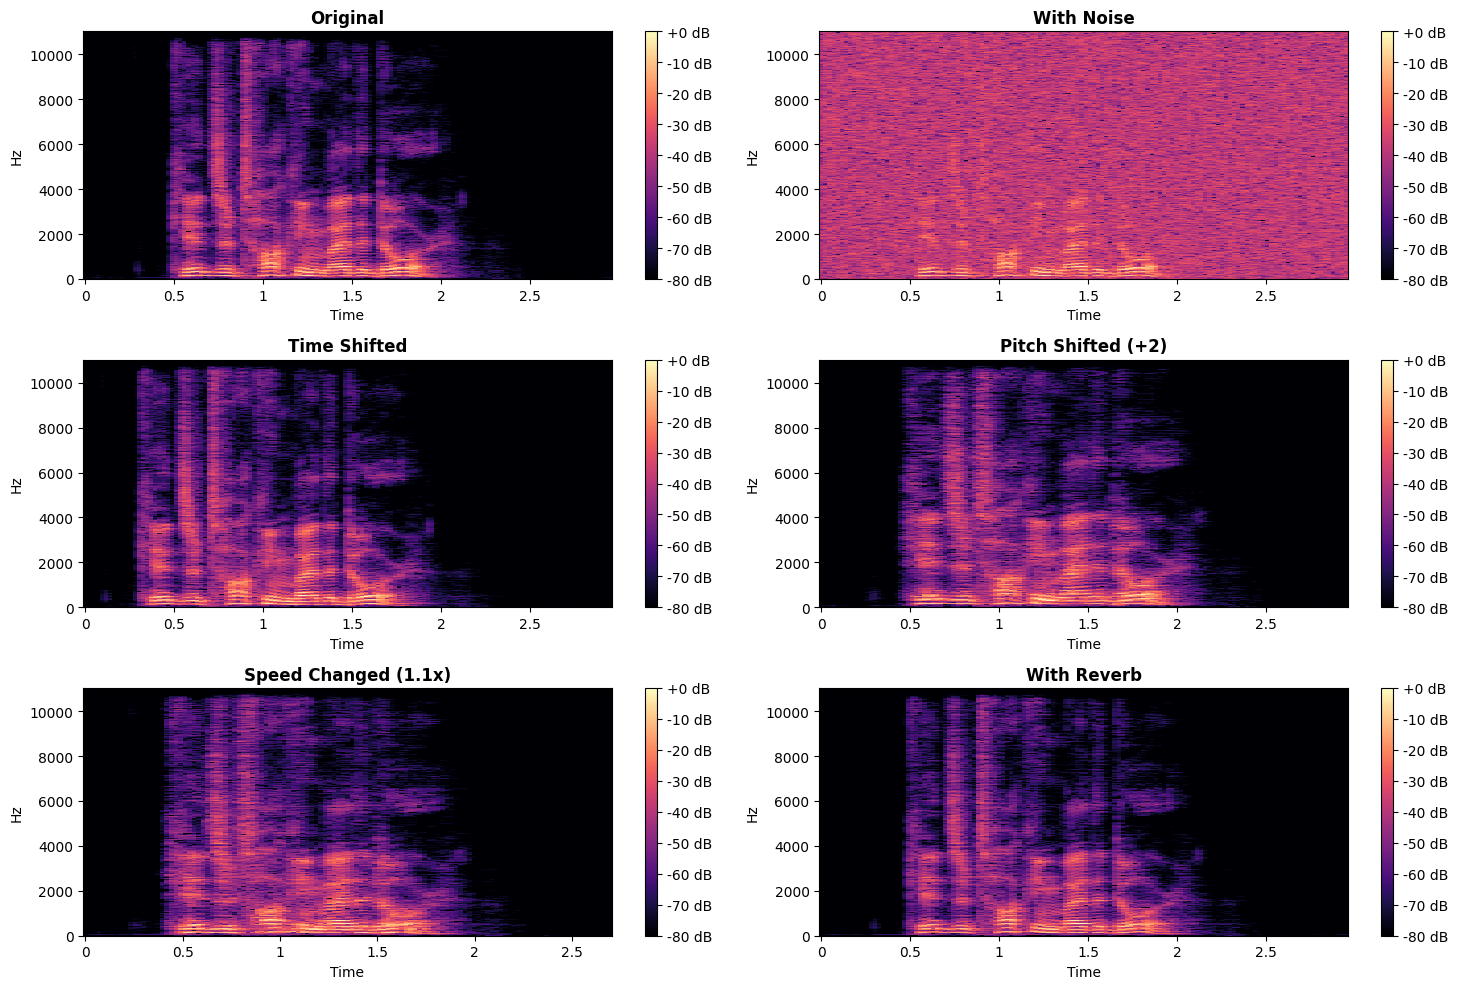

In [13]:
# Spectrograms comparison
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (title, aug_audio) in enumerate(augmentations.items()):
    D = librosa.amplitude_to_db(np.abs(librosa.stft(aug_audio)), ref=np.max)
    img = librosa.display.specshow(D, sr=SAMPLE_RATE, x_axis="time", y_axis="hz", ax=axes[idx])
    axes[idx].set_title(title, fontsize=12, fontweight="bold")
    fig.colorbar(img, ax=axes[idx], format="%+2.0f dB")

plt.tight_layout()
plt.savefig("../results/plots/augmentation_spectrograms.png", dpi=300, bbox_inches="tight")
plt.show()

In [14]:
# Augmented audios
for title, aug_audio in augmentations.items():
    print(f"\n{title}:")
    ipd.display(ipd.Audio(aug_audio, rate=SAMPLE_RATE))


Original:



With Noise:



Time Shifted:



Pitch Shifted (+2):



Speed Changed (1.1x):



With Reverb:


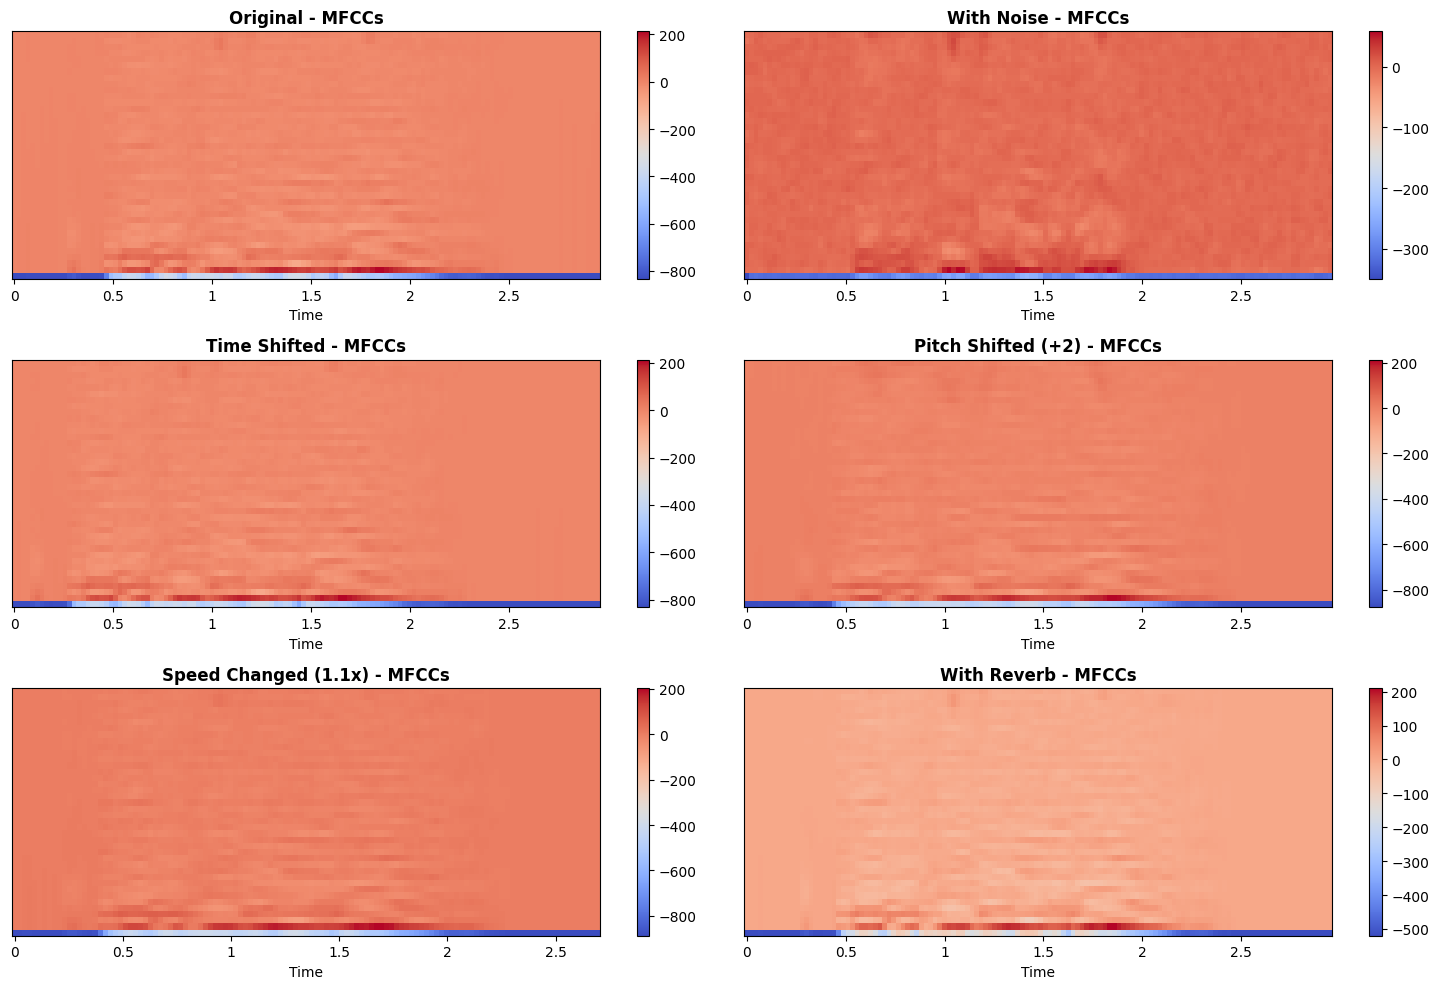

In [16]:
# MFCCs comparison
fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, (title, aug_audio) in enumerate(augmentations.items()):
    mfccs = librosa.feature.mfcc(y=aug_audio, sr=SAMPLE_RATE, n_mfcc=N_MFCC)
    img = librosa.display.specshow(mfccs, sr=SAMPLE_RATE, x_axis="time", ax=axes[idx])
    axes[idx].set_title(f"{title} - MFCCs", fontsize=12, fontweight="bold")
    fig.colorbar(img, ax=axes[idx])

plt.tight_layout()
plt.savefig("../results/plots/augmentation_mfccs.png", dpi=300, bbox_inches="tight")
plt.show()

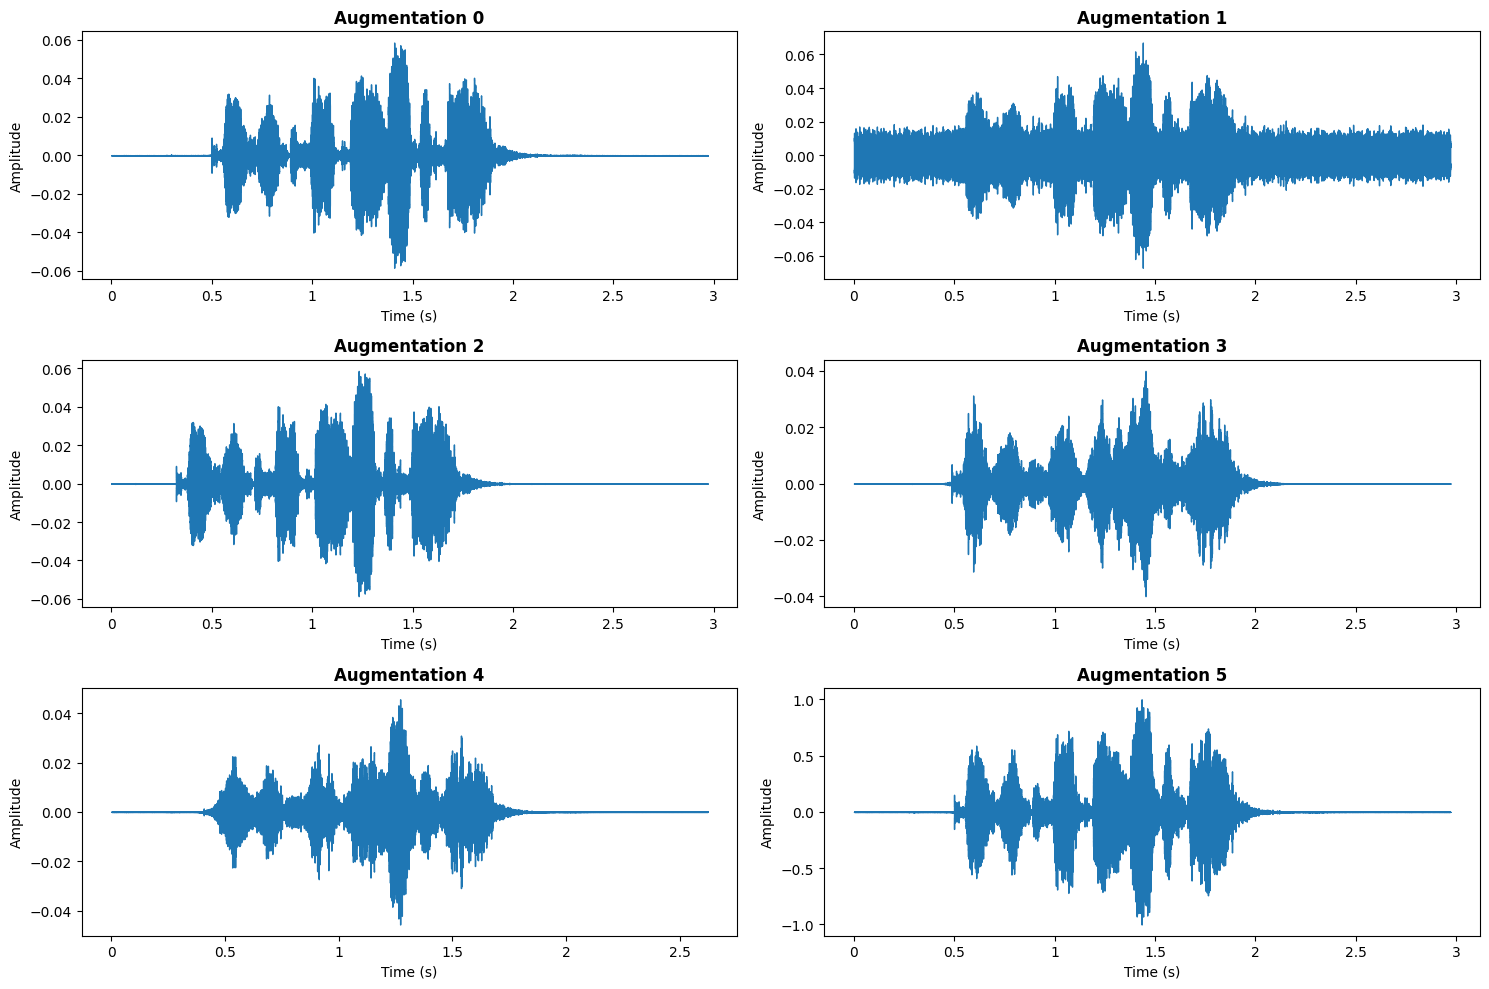

In [17]:
# Test multiple random augmentations
n_augmentations = 5
random_augmentations = generate_augmented_samples(audio, sr=SAMPLE_RATE, n_augmentations=n_augmentations)

fig, axes = plt.subplots(3, 2, figsize=(15, 10))
axes = axes.ravel()

for idx, aug_audio in enumerate(random_augmentations):
    librosa.display.waveshow(aug_audio, sr=SAMPLE_RATE, ax=axes[idx])
    axes[idx].set_title(f"Augmentation {idx}", fontsize=12, fontweight="bold")
    axes[idx].set_xlabel("Time (s)")
    axes[idx].set_ylabel("Amplitude")

plt.tight_layout()
plt.savefig("../results/plots/random_augmentations.png", dpi=300, bbox_inches="tight")
plt.show()

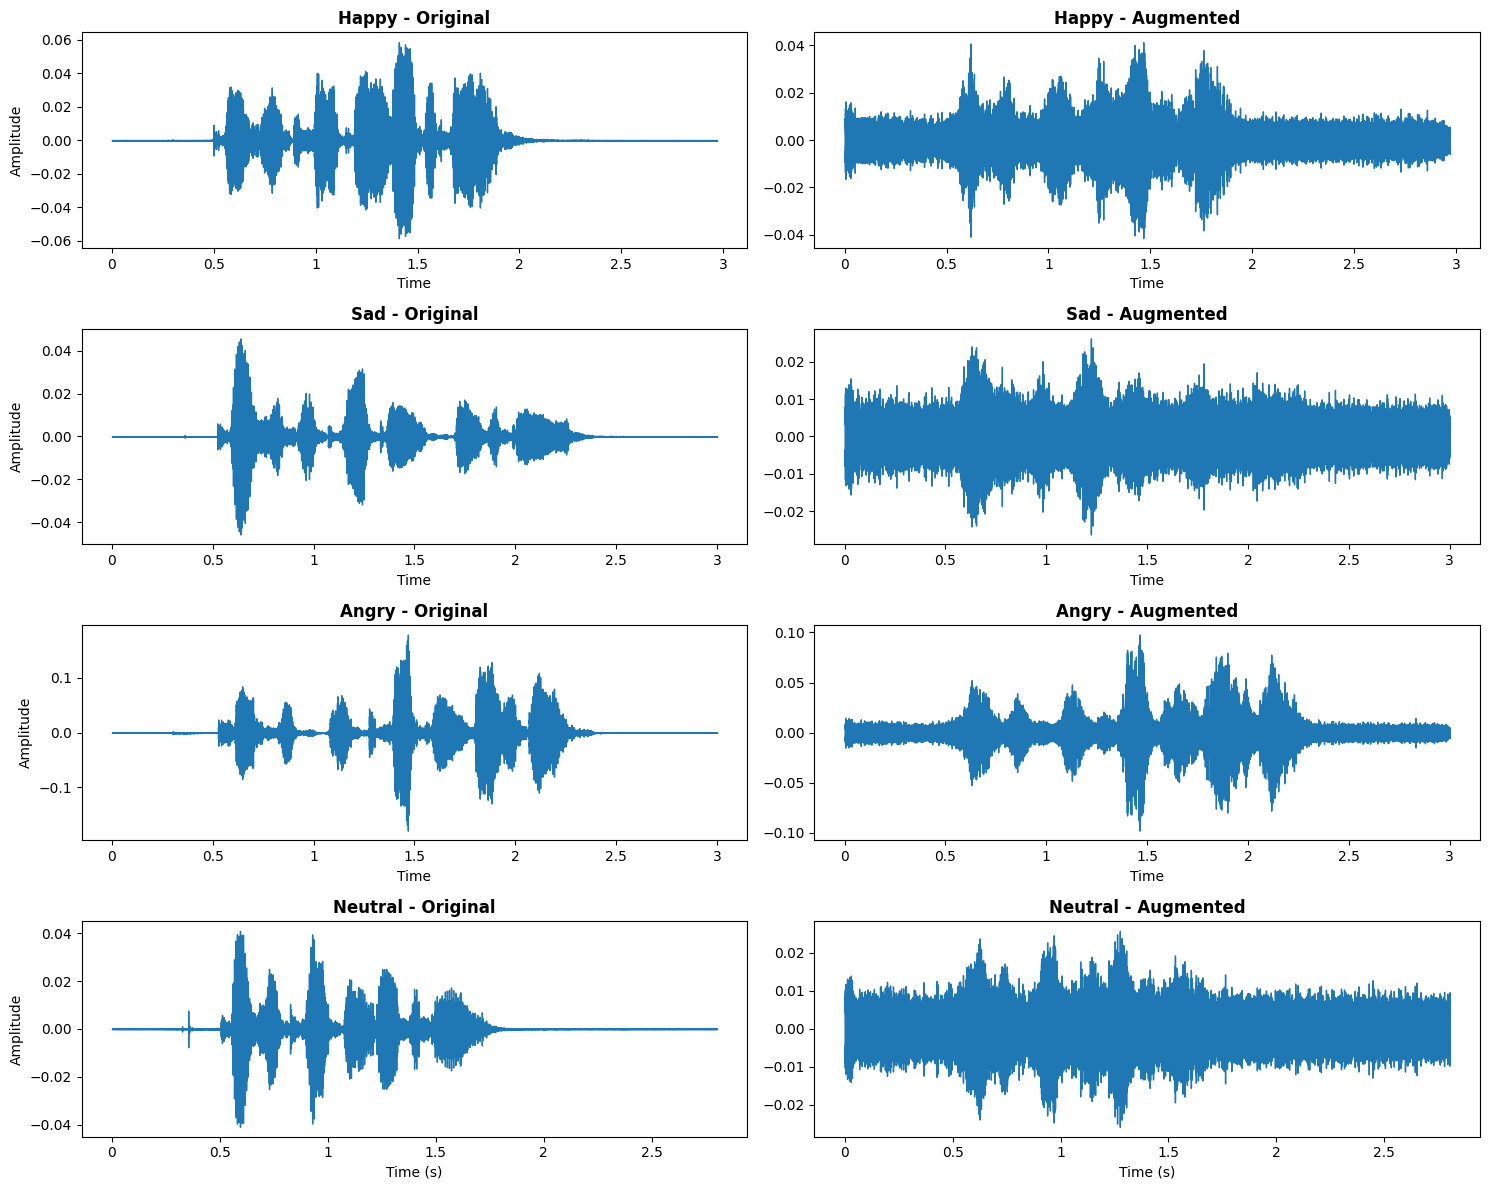

In [18]:
# Augmentation effects on different emotions
emotions_to_test = ["happy", "sad", "angry", "neutral"]

fig, axes = plt.subplots(len(emotions_to_test), 2, figsize=(15, 12))

for i, emotion in enumerate(emotions_to_test):
    sample = df[df["emotion"] == emotion].iloc[0]
    audio = load_audio_file(sample["file_path"])

    # Original
    librosa.display.waveshow(audio, sr=SAMPLE_RATE, ax=axes[i, 0])
    axes[i, 0].set_title(f"{emotion.capitalize()} - Original", fontweight="bold")
    axes[i, 0].set_ylabel("Amplitude")

    # Augmented (noise + pitch)
    aug_audio = add_noise(audio, noise_factor=0.005)
    aug_audio = change_pitch(aug_audio, sr=SAMPLE_RATE, pitch_factor=1.5)
    librosa.display.waveshow(aug_audio, sr=SAMPLE_RATE, ax=axes[i, 1])
    axes[i, 1].set_title(f"{emotion.capitalize()} - Augmented", fontweight="bold")

    if i == len(emotions_to_test) - 1:
        axes[i, 0].set_xlabel("Time (s)")
        axes[i, 1].set_xlabel("Time (s)")

plt.tight_layout()
plt.savefig("../results/plots/emotion_augmentation_comparison.png", dpi=300, bbox_inches="tight")
plt.show()